In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# TRAIN DATA
import pandas as pd
import numpy as np
path_train_df = "/content/drive/My Drive/UCLA_WiDS_Team_2/DATA/TRAIN/train_data.csv"
train_df = pd.read_csv(path_train_df)
train_df.head()

,participant_id,Basic_Demos_Enroll_Year_2015,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_1,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,...,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn,ADHD_Outcome,Sex_F
0,00aIpNTbG5uh,0,0,0,0,1,0,0,0,0,...,-0.031380,0.032986,0.081980,0.093708,0.021903,0.029458,-0.016072,0.169368,1,0
1,00fV0OyyoLfw,0,0,1,0,0,0,1,0,0,...,0.038632,-0.042040,0.125651,0.127045,0.142448,0.051943,0.138729,0.168951,1,0
2,04X1eiS79T4B,0,0,1,0,0,0,1,0,0,...,0.013774,-0.057094,0.084471,0.075582,0.093687,0.091592,0.114817,0.157812,0,1
3,05ocQutkURd6,0,0,0,1,0,0,1,0,0,...,-0.075685,-0.029209,0.087122,0.009254,0.114800,0.218728,0.090305,0.159943,0,1
4,06YUNBA9ZRLq,0,0,0,1,0,0,1,0,0,...,-0.005693,-0.001515,0.166933,0.005170,0.005126,0.126259,-0.038223,0.181322,1,0


In [3]:
# TEST DATA
path_test_df = "/content/drive/My Drive/UCLA_WiDS_Team_2/DATA/TEST/test_data.csv"
test_df = pd.read_csv(path_test_df)
test_df

,participant_id,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Enroll_Year_2021,Basic_Demos_Enroll_Year_2022,Basic_Demos_Enroll_Year_2023,Basic_Demos_Study_Site_4,Basic_Demos_Study_Site_5,PreInt_Demos_Fam_Child_Ethnicity_0,PreInt_Demos_Fam_Child_Ethnicity_1,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,06HFIpqKfXy9,0,0,0,1,0,1,0,1,0,...,-0.171494,-0.079049,-0.128106,0.032995,0.694219,0.613945,0.630588,0.779263,0.754823,0.756910
1,0Dua0TUw4sNZ,0,0,0,1,0,1,0,1,0,...,-0.114537,-0.335557,-0.332730,-0.269291,0.560999,0.257644,0.408561,0.511488,0.562810,0.675409
2,0ImS6uhE3Ie9,0,0,0,1,0,1,0,1,0,...,-0.255720,-0.485507,-0.550848,-0.180113,0.577629,0.286951,0.277112,0.511196,0.151136,0.257977
3,0VHL9SCh2TfC,0,0,0,1,0,1,0,1,0,...,-0.017113,-0.287335,-0.214770,-0.142741,0.595638,0.261825,0.527854,0.451681,0.448957,0.674929
4,0X2H4LroxZcw,0,0,0,1,0,1,0,1,0,...,0.489746,0.390103,0.136136,0.104373,0.497195,0.426041,0.373427,0.548506,0.413911,0.681860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,ypPOBnAE3X5L,0,0,0,1,0,1,0,1,0,...,0.245840,0.525043,0.534241,0.432753,0.218000,0.191885,0.401691,0.407678,0.357947,0.681538
300,z0TcjaAHc8af,0,0,0,1,0,1,0,1,0,...,0.006018,-0.076958,0.085048,-0.079458,0.585970,0.314718,0.378953,0.265000,0.521509,0.516675
301,zHoI2y6ghT8f,0,0,0,0,1,1,0,1,0,...,-0.301195,-0.501310,-0.431554,-0.073070,0.707905,0.417222,0.050709,0.667116,0.108085,0.447359
302,zIkbsyNlTbCK,0,0,0,1,0,1,0,0,0,...,0.055642,-0.156553,0.124094,0.116690,0.388421,0.090254,0.245171,0.320487,0.260784,0.321819


In [4]:
adhd = train_df['ADHD_Outcome']
sex = train_df['Sex_F']

In [5]:
num_adhd = train_df['ADHD_Outcome'].value_counts()
num_adhd    #noticed the values are imbalanced

,count
ADHD_Outcome,
1,831
0,382


In [6]:
num_sex = train_df['Sex_F'].value_counts()
num_sex     #noticed the values are imbalanced

,count
Sex_F,
0,797
1,416


In [7]:
def drop_uncommon_columns(df1, df2):
    # Find common columns
    common_columns = df1.columns.intersection(df2.columns)

    # Keep only common columns
    df1 = df1[common_columns]
    df2 = df2[common_columns]

    return df1, df2

train_df, test_df = drop_uncommon_columns(train_df, test_df)

test_df

,participant_id,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_4,PreInt_Demos_Fam_Child_Ethnicity_0,PreInt_Demos_Fam_Child_Ethnicity_1,PreInt_Demos_Fam_Child_Ethnicity_2,PreInt_Demos_Fam_Child_Ethnicity_3,PreInt_Demos_Fam_Child_Race_0,PreInt_Demos_Fam_Child_Race_1,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,06HFIpqKfXy9,0,0,1,1,0,0,0,1,0,...,-0.171494,-0.079049,-0.128106,0.032995,0.694219,0.613945,0.630588,0.779263,0.754823,0.756910
1,0Dua0TUw4sNZ,0,0,1,1,0,0,0,1,0,...,-0.114537,-0.335557,-0.332730,-0.269291,0.560999,0.257644,0.408561,0.511488,0.562810,0.675409
2,0ImS6uhE3Ie9,0,0,1,1,0,0,0,1,0,...,-0.255720,-0.485507,-0.550848,-0.180113,0.577629,0.286951,0.277112,0.511196,0.151136,0.257977
3,0VHL9SCh2TfC,0,0,1,1,0,0,0,1,0,...,-0.017113,-0.287335,-0.214770,-0.142741,0.595638,0.261825,0.527854,0.451681,0.448957,0.674929
4,0X2H4LroxZcw,0,0,1,1,0,0,0,1,0,...,0.489746,0.390103,0.136136,0.104373,0.497195,0.426041,0.373427,0.548506,0.413911,0.681860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,ypPOBnAE3X5L,0,0,1,1,0,0,0,0,0,...,0.245840,0.525043,0.534241,0.432753,0.218000,0.191885,0.401691,0.407678,0.357947,0.681538
300,z0TcjaAHc8af,0,0,1,1,0,0,0,0,0,...,0.006018,-0.076958,0.085048,-0.079458,0.585970,0.314718,0.378953,0.265000,0.521509,0.516675
301,zHoI2y6ghT8f,0,0,1,1,0,0,0,0,1,...,-0.301195,-0.501310,-0.431554,-0.073070,0.707905,0.417222,0.050709,0.667116,0.108085,0.447359
302,zIkbsyNlTbCK,0,0,1,0,0,0,1,1,0,...,0.055642,-0.156553,0.124094,0.116690,0.388421,0.090254,0.245171,0.320487,0.260784,0.321819


In [8]:
train_df

,participant_id,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_4,PreInt_Demos_Fam_Child_Ethnicity_0,PreInt_Demos_Fam_Child_Ethnicity_1,PreInt_Demos_Fam_Child_Ethnicity_2,PreInt_Demos_Fam_Child_Ethnicity_3,PreInt_Demos_Fam_Child_Race_0,PreInt_Demos_Fam_Child_Race_1,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,00aIpNTbG5uh,1,0,1,0,1,0,0,1,0,...,0.066630,0.053134,-0.031380,0.032986,0.081980,0.093708,0.021903,0.029458,-0.016072,0.169368
1,00fV0OyyoLfw,0,0,0,1,0,0,0,0,0,...,0.050297,-0.063647,0.038632,-0.042040,0.125651,0.127045,0.142448,0.051943,0.138729,0.168951
2,04X1eiS79T4B,0,0,0,0,1,0,0,0,0,...,-0.047927,0.089904,0.013774,-0.057094,0.084471,0.075582,0.093687,0.091592,0.114817,0.157812
3,05ocQutkURd6,0,0,0,0,0,0,1,0,0,...,-0.089097,-0.012534,-0.075685,-0.029209,0.087122,0.009254,0.114800,0.218728,0.090305,0.159943
4,06YUNBA9ZRLq,0,0,0,1,0,0,0,0,1,...,0.043080,-0.026789,-0.005693,-0.001515,0.166933,0.005170,0.005126,0.126259,-0.038223,0.181322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,zpU7rEseBMH8,0,0,0,1,0,0,0,0,0,...,-0.021261,-0.049549,0.025603,0.012846,0.091032,0.071392,0.045143,0.087861,0.124018,0.198580
1209,zpr8w4jCfVPe,1,0,0,0,1,0,0,0,0,...,0.021217,0.050498,0.043203,0.000718,0.161472,0.101601,0.076582,0.172203,0.134200,0.166221
1210,zwBG0rZ05Mcb,0,0,0,1,0,0,0,1,0,...,-0.038567,-0.007948,-0.013726,-0.079526,0.099933,-0.009852,0.038169,0.182069,0.080787,0.123945
1211,zwXD5v17Rx01,0,0,0,1,0,0,0,1,0,...,-0.021346,-0.047564,0.033677,-0.019995,0.143186,-0.035425,0.162715,0.068137,0.093588,0.144960


In [9]:
adhd

,ADHD_Outcome
0,1
1,1
2,0
3,0
4,1
...,...
1208,1
1209,1
1210,0
1211,1


In [10]:
sex

,Sex_F
0,0
1,0
2,1
3,1
4,0
...,...
1208,0
1209,0
1210,0
1211,0


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

ADHD MODEL


In [12]:
y = adhd
X = train_df.drop(columns=['participant_id'], axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
import joblib
def train_test_RF(X_train, X_test, y_train, y_test, depth, leaf=2, split=4, crit='entropy'):
  model = RandomForestClassifier(criterion = crit, max_depth = depth, min_samples_leaf = leaf, min_samples_split=split, class_weight="balanced")
  model.fit(X_train, y_train)
  class_label_predictions = model.predict(X_test)
  acc_score = accuracy_score(y_test, class_label_predictions)
  return model, acc_score

In [15]:
max_depth_range = [2]
acc = []
for md in max_depth_range:
  a_model_rf, score = train_test_RF(X_train, X_test, y_train, y_test, md)
  joblib.dump(a_model_rf, 'rf_adhd_predict.pkl')
  print('Max Depth=' + str(md) + ', accuracy score: ' + str(score))
  acc.append(float(score))

Max Depth=2, accuracy score: 0.7554945054945055


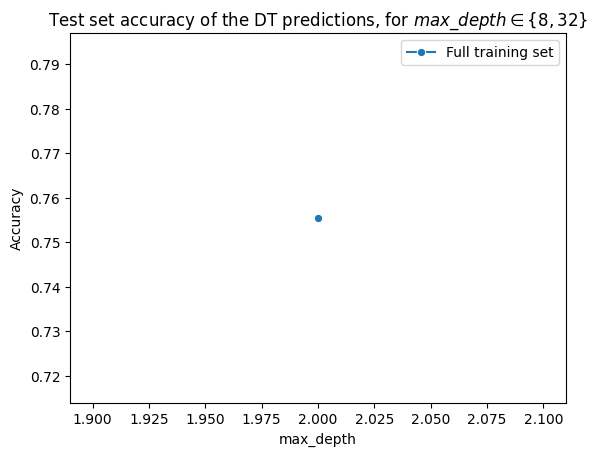

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
p = sns.lineplot(x=max_depth_range, y=acc, marker='o', label = 'Full training set')
plt.title('Test set accuracy of the DT predictions, for $max\_depth\in\{8,32\}$')
ax.set_xlabel('max_depth')
ax.set_ylabel('Accuracy')
plt.show()

SEX MODEL

In [17]:
y = sex
X = train_df.drop(columns=['participant_id'], axis=1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [19]:
max_depth_range = [2]
acc = []
for md in max_depth_range:
  s_model_rf, score = train_test_RF(X_train, X_test, y_train, y_test, md)
  joblib.dump(s_model_rf, 'rf_sex_predict.pkl')
  print('Max Depth=' + str(md) + ', accuracy score: ' + str(score))
  acc.append(float(score))

Max Depth=2, accuracy score: 0.6071428571428571


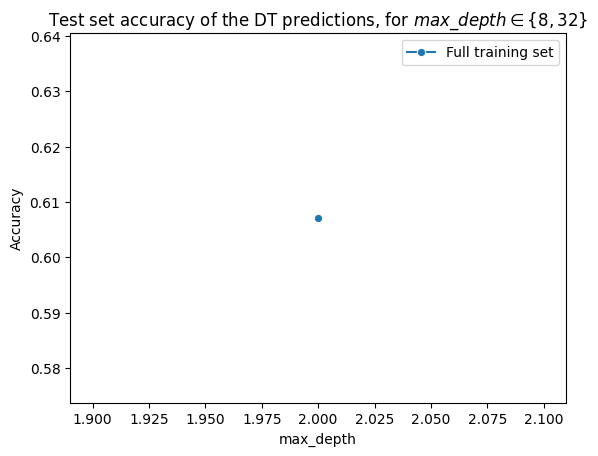

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
p = sns.lineplot(x=max_depth_range, y=acc, marker='o', label = 'Full training set')
plt.title('Test set accuracy of the DT predictions, for $max\_depth\in\{8,32\}$')
ax.set_xlabel('max_depth')
ax.set_ylabel('Accuracy')
plt.show()

# NOW FOR THE TESTING ON THE TEST DATA

In [21]:
test_df

,participant_id,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_4,PreInt_Demos_Fam_Child_Ethnicity_0,PreInt_Demos_Fam_Child_Ethnicity_1,PreInt_Demos_Fam_Child_Ethnicity_2,PreInt_Demos_Fam_Child_Ethnicity_3,PreInt_Demos_Fam_Child_Race_0,PreInt_Demos_Fam_Child_Race_1,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,06HFIpqKfXy9,0,0,1,1,0,0,0,1,0,...,-0.171494,-0.079049,-0.128106,0.032995,0.694219,0.613945,0.630588,0.779263,0.754823,0.756910
1,0Dua0TUw4sNZ,0,0,1,1,0,0,0,1,0,...,-0.114537,-0.335557,-0.332730,-0.269291,0.560999,0.257644,0.408561,0.511488,0.562810,0.675409
2,0ImS6uhE3Ie9,0,0,1,1,0,0,0,1,0,...,-0.255720,-0.485507,-0.550848,-0.180113,0.577629,0.286951,0.277112,0.511196,0.151136,0.257977
3,0VHL9SCh2TfC,0,0,1,1,0,0,0,1,0,...,-0.017113,-0.287335,-0.214770,-0.142741,0.595638,0.261825,0.527854,0.451681,0.448957,0.674929
4,0X2H4LroxZcw,0,0,1,1,0,0,0,1,0,...,0.489746,0.390103,0.136136,0.104373,0.497195,0.426041,0.373427,0.548506,0.413911,0.681860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,ypPOBnAE3X5L,0,0,1,1,0,0,0,0,0,...,0.245840,0.525043,0.534241,0.432753,0.218000,0.191885,0.401691,0.407678,0.357947,0.681538
300,z0TcjaAHc8af,0,0,1,1,0,0,0,0,0,...,0.006018,-0.076958,0.085048,-0.079458,0.585970,0.314718,0.378953,0.265000,0.521509,0.516675
301,zHoI2y6ghT8f,0,0,1,1,0,0,0,0,1,...,-0.301195,-0.501310,-0.431554,-0.073070,0.707905,0.417222,0.050709,0.667116,0.108085,0.447359
302,zIkbsyNlTbCK,0,0,1,0,0,0,1,1,0,...,0.055642,-0.156553,0.124094,0.116690,0.388421,0.090254,0.245171,0.320487,0.260784,0.321819


In [22]:
test_df['ADHD_Outcome'] = ""
test_df

<ipython-input-22-a32913e6e860>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['ADHD_Outcome'] = ""


,participant_id,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_4,PreInt_Demos_Fam_Child_Ethnicity_0,PreInt_Demos_Fam_Child_Ethnicity_1,PreInt_Demos_Fam_Child_Ethnicity_2,PreInt_Demos_Fam_Child_Ethnicity_3,PreInt_Demos_Fam_Child_Race_0,PreInt_Demos_Fam_Child_Race_1,...,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn,ADHD_Outcome
0,06HFIpqKfXy9,0,0,1,1,0,0,0,1,0,...,-0.079049,-0.128106,0.032995,0.694219,0.613945,0.630588,0.779263,0.754823,0.756910,
1,0Dua0TUw4sNZ,0,0,1,1,0,0,0,1,0,...,-0.335557,-0.332730,-0.269291,0.560999,0.257644,0.408561,0.511488,0.562810,0.675409,
2,0ImS6uhE3Ie9,0,0,1,1,0,0,0,1,0,...,-0.485507,-0.550848,-0.180113,0.577629,0.286951,0.277112,0.511196,0.151136,0.257977,
3,0VHL9SCh2TfC,0,0,1,1,0,0,0,1,0,...,-0.287335,-0.214770,-0.142741,0.595638,0.261825,0.527854,0.451681,0.448957,0.674929,
4,0X2H4LroxZcw,0,0,1,1,0,0,0,1,0,...,0.390103,0.136136,0.104373,0.497195,0.426041,0.373427,0.548506,0.413911,0.681860,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,ypPOBnAE3X5L,0,0,1,1,0,0,0,0,0,...,0.525043,0.534241,0.432753,0.218000,0.191885,0.401691,0.407678,0.357947,0.681538,
300,z0TcjaAHc8af,0,0,1,1,0,0,0,0,0,...,-0.076958,0.085048,-0.079458,0.585970,0.314718,0.378953,0.265000,0.521509,0.516675,
301,zHoI2y6ghT8f,0,0,1,1,0,0,0,0,1,...,-0.501310,-0.431554,-0.073070,0.707905,0.417222,0.050709,0.667116,0.108085,0.447359,
302,zIkbsyNlTbCK,0,0,1,0,0,0,1,1,0,...,-0.156553,0.124094,0.116690,0.388421,0.090254,0.245171,0.320487,0.260784,0.321819,


In [23]:
X = test_df.drop(columns=['participant_id', 'ADHD_Outcome'], axis=1)
test_df['ADHD_Outcome'] = a_model_rf.predict(X)
test_df['ADHD_Outcome']

<ipython-input-23-a0c145727735>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['ADHD_Outcome'] = a_model_rf.predict(X)


,ADHD_Outcome
0,1
1,0
2,0
3,0
4,1
...,...
299,0
300,0
301,0
302,0


In [24]:
test_df['Sex_F'] = ""
test_df

<ipython-input-24-0f8fdbae3754>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Sex_F'] = ""


,participant_id,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_4,PreInt_Demos_Fam_Child_Ethnicity_0,PreInt_Demos_Fam_Child_Ethnicity_1,PreInt_Demos_Fam_Child_Ethnicity_2,PreInt_Demos_Fam_Child_Ethnicity_3,PreInt_Demos_Fam_Child_Race_0,PreInt_Demos_Fam_Child_Race_1,...,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn,ADHD_Outcome,Sex_F
0,06HFIpqKfXy9,0,0,1,1,0,0,0,1,0,...,-0.128106,0.032995,0.694219,0.613945,0.630588,0.779263,0.754823,0.756910,1,
1,0Dua0TUw4sNZ,0,0,1,1,0,0,0,1,0,...,-0.332730,-0.269291,0.560999,0.257644,0.408561,0.511488,0.562810,0.675409,0,
2,0ImS6uhE3Ie9,0,0,1,1,0,0,0,1,0,...,-0.550848,-0.180113,0.577629,0.286951,0.277112,0.511196,0.151136,0.257977,0,
3,0VHL9SCh2TfC,0,0,1,1,0,0,0,1,0,...,-0.214770,-0.142741,0.595638,0.261825,0.527854,0.451681,0.448957,0.674929,0,
4,0X2H4LroxZcw,0,0,1,1,0,0,0,1,0,...,0.136136,0.104373,0.497195,0.426041,0.373427,0.548506,0.413911,0.681860,1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,ypPOBnAE3X5L,0,0,1,1,0,0,0,0,0,...,0.534241,0.432753,0.218000,0.191885,0.401691,0.407678,0.357947,0.681538,0,
300,z0TcjaAHc8af,0,0,1,1,0,0,0,0,0,...,0.085048,-0.079458,0.585970,0.314718,0.378953,0.265000,0.521509,0.516675,0,
301,zHoI2y6ghT8f,0,0,1,1,0,0,0,0,1,...,-0.431554,-0.073070,0.707905,0.417222,0.050709,0.667116,0.108085,0.447359,0,
302,zIkbsyNlTbCK,0,0,1,0,0,0,1,1,0,...,0.124094,0.116690,0.388421,0.090254,0.245171,0.320487,0.260784,0.321819,0,


In [25]:
X = test_df.drop(columns=['participant_id', 'Sex_F', 'ADHD_Outcome'], axis=1)
test_df['Sex_F'] = s_model_rf.predict(X)
test_df['Sex_F']

<ipython-input-25-bc688da2010f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Sex_F'] = s_model_rf.predict(X)


,Sex_F
0,0
1,0
2,0
3,0
4,0
...,...
299,0
300,0
301,0
302,0


In [26]:
df = test_df[['participant_id', 'ADHD_Outcome', 'Sex_F']]
df

,participant_id,ADHD_Outcome,Sex_F
0,06HFIpqKfXy9,1,0
1,0Dua0TUw4sNZ,0,0
2,0ImS6uhE3Ie9,0,0
3,0VHL9SCh2TfC,0,0
4,0X2H4LroxZcw,1,0
...,...,...,...
299,ypPOBnAE3X5L,0,0
300,z0TcjaAHc8af,0,0
301,zHoI2y6ghT8f,0,0
302,zIkbsyNlTbCK,0,0


In [27]:
filename = 'ami_submission_rf.csv'
df.to_csv(filename, index=False)

OPTMIZING - RandomSearch

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Separate features and targets
# X = train_df.drop(columns=['ADHD_Outcome', 'Sex_F'])  # Drop target columns
# y_adhd = train_df['ADHD_Outcome']
# y_sex = train_df['Sex_F']

X = train_df.drop(columns=['participant_id'], axis=1)
y_adhd = adhd  # Using the original adhd series
y_sex = sex  # Using the original sex series

# Split data for validation
X_train, X_val, y_train_adhd, y_val_adhd = train_test_split(X, y_adhd, test_size=0.2, random_state=42, stratify=y_adhd)
X_train_sex, X_val_sex, y_train_sex, y_val_sex = train_test_split(X, y_sex, test_size=0.2, random_state=42, stratify=y_sex)

# Hyperparameter tuning grid
param_grid = {
    'n_estimators': [100, 300, 500, 800],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Train ADHD_Outcome Model
rf_adhd = RandomForestClassifier(random_state=42, class_weight="balanced")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
search_adhd = RandomizedSearchCV(rf_adhd, param_grid, scoring='f1', cv=cv, n_iter=20, n_jobs=-1, random_state=42)
search_adhd.fit(X_train, y_train_adhd)
best_rf_adhd = search_adhd.best_estimator_
best_rf_adhd.fit(X_train, y_train_adhd)

# # Train Sex_F Model
# rf_sex = RandomForestClassifier(random_state=42)
# search_sex = RandomizedSearchCV(rf_sex, param_grid, scoring='f1', cv=cv, n_iter=20, n_jobs=-1, random_state=42)
# search_sex.fit(X_train_sex, y_train_sex)
# best_rf_sex = search_sex.best_estimator_
# best_rf_sex.fit(X_train_sex, y_train_sex)


KeyboardInterrupt: 

In [29]:
# Train Sex_F Model
rf_sex = RandomForestClassifier(random_state=42)
search_sex = RandomizedSearchCV(rf_sex, param_grid, scoring='f1', cv=cv, n_iter=20, n_jobs=-1, random_state=42)
search_sex.fit(X_train_sex, y_train_sex)
best_rf_sex = search_sex.best_estimator_
best_rf_sex.fit(X_train_sex, y_train_sex)

RandomForestClassifier(bootstrap=False, min_samples_split=5, random_state=42)

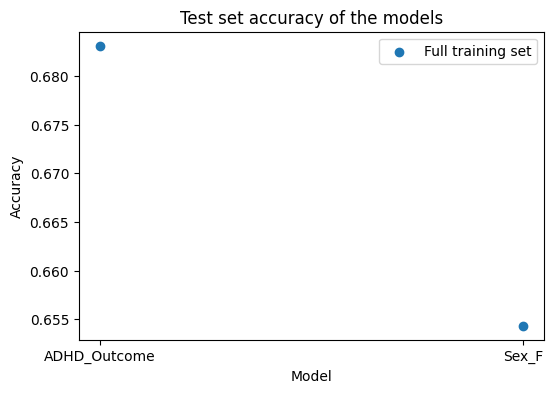

ADHD Model Accuracy: 0.6831
Sex Model Accuracy: 0.6543


In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Get accuracy scores
y_pred_adhd = best_rf_adhd.predict(X_val)
y_pred_sex = best_rf_sex.predict(X_val_sex)

accuracy_adhd = accuracy_score(y_val_adhd, y_pred_adhd)
accuracy_sex = accuracy_score(y_val_sex, y_pred_sex)

# Plot results
plt.figure(figsize=(6, 4))
x_values = [1, 2]  # Representing ADHD and Sex_F models
y_values = [accuracy_adhd, accuracy_sex]

plt.scatter(x_values, y_values, label="Full training set")

plt.xticks([1, 2], ["ADHD_Outcome", "Sex_F"])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Test set accuracy of the models")

plt.legend()
plt.show()

# Print accuracy scores
print(f"ADHD Model Accuracy: {accuracy_adhd:.4f}")
print(f"Sex Model Accuracy: {accuracy_sex:.4f}")


In [31]:
# Predict on test data
X_test = test_df.drop(columns=['participant_id', 'ADHD_Outcome', 'Sex_F'])  # Ensure only features are used
predicted_ADHD = best_rf_adhd.predict(X_test)
predicted_Sex_F = best_rf_sex.predict(X_test)

# Create submission file
submission = test_df[['participant_id']].copy()
submission['ADHD_Outcome'] = predicted_ADHD
submission['Sex_F'] = predicted_Sex_F

# Save submission
submission.to_csv("submission_rf_optimized.csv", index=False)

print("Optimized model trained and submission file created.")


Optimized model trained and submission file created.
